In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/breast-cancer-wisconsin-data/data.csv


In [2]:
df=pd.read_csv("../input/breast-cancer-wisconsin-data/data.csv")
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [3]:
df["id"]

0        842302
1        842517
2      84300903
3      84348301
4      84358402
         ...   
564      926424
565      926682
566      926954
567      927241
568       92751
Name: id, Length: 569, dtype: int64

In [4]:
df.drop("id",axis=1, inplace=True)
df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [5]:
df.drop("Unnamed: 32",axis=1, inplace=True)
df


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [6]:
df.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [7]:
df.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [8]:
from sklearn.preprocessing import LabelEncoder

In [9]:
le=LabelEncoder()

In [10]:
le.fit_transform(df["diagnosis"])

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,

In [11]:
df["diagnosis"]=le.fit_transform(df["diagnosis"])
df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [12]:
df["diagnosis"].value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

In [13]:
df.corr()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,0.330499,...,0.776454,0.456903,0.782914,0.733825,0.421465,0.590998,0.659610,0.793566,0.416294,0.323872
radius_mean,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,0.330499,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413


In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:>

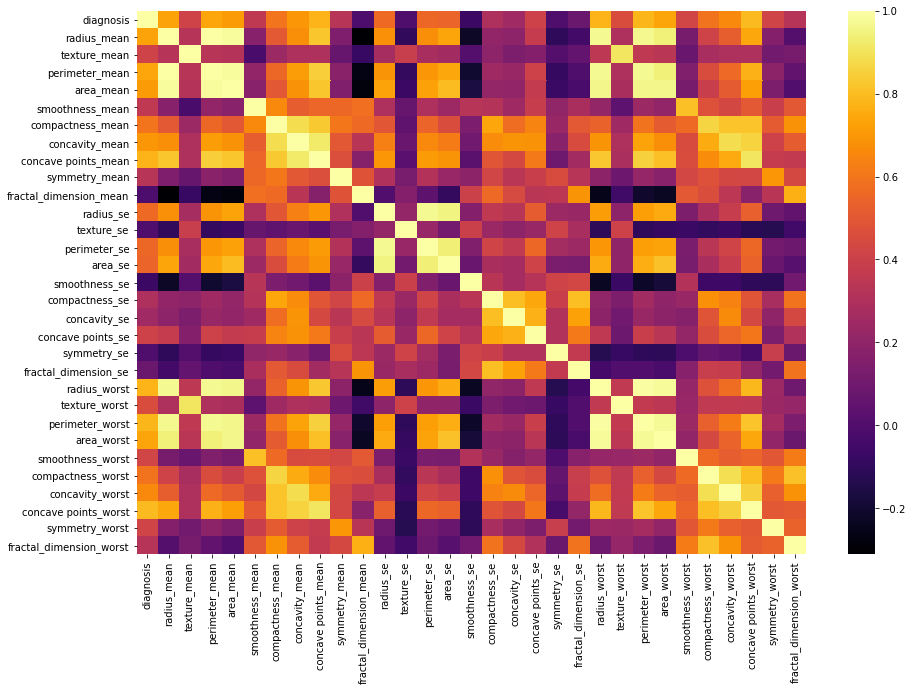

In [15]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),cmap="inferno")

In [16]:
df.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [17]:
X=df.drop("diagnosis",axis=1)
X=X.values
X

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [18]:
y=df["diagnosis"]
y=y.values
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.2)

In [21]:
X_train.shape

(455, 30)

In [22]:
y_train.shape

(455,)

In [23]:
X_test.shape

(114, 30)

In [24]:
y_test.shape

(114,)

In [25]:
from sklearn.preprocessing import StandardScaler

In [26]:
sc=StandardScaler()

In [27]:
X_train=sc.fit_transform(X_train)
X_train

array([[-0.07000999, -0.54132763, -0.03775646, ...,  0.76648208,
         1.20462283,  1.29502501],
       [-0.76283478,  0.47386135, -0.77267808, ..., -0.46854643,
        -0.08460804,  0.26909183],
       [-0.30370089,  0.69893789, -0.39368441, ..., -1.56756036,
        -0.94409529, -1.47522802],
       ...,
       [ 0.13618787, -0.83205149,  0.03064533, ..., -0.83702202,
        -0.56585652, -1.56159782],
       [ 0.23241353, -0.03256087,  0.20363825, ...,  0.51983513,
         0.12945901,  0.05900312],
       [-0.97453124,  0.23002843, -0.86533865, ...,  0.48395921,
        -0.45801823,  2.11787244]])

In [28]:
X_test=sc.transform(X_test)
X_test

array([[-0.4824057 ,  0.6004669 , -0.48236813, ...,  0.09530343,
         0.14555427,  0.51944753],
       [ 0.55408218,  0.3378776 ,  0.64387538, ...,  1.39281583,
         1.32694686,  1.77939619],
       [ 0.43861139, -1.24469181,  0.40128762, ...,  0.34792969,
        -0.25521787, -0.7585921 ],
       ...,
       [ 1.48884579,  3.10209886,  1.43526825, ...,  0.72313201,
        -0.27131314, -0.46855297],
       [ 0.16368091,  0.55123141,  0.14478089, ...,  1.03555147,
         1.31407064,  1.49927792],
       [-0.33394324, -0.7781269 , -0.32488493, ..., -0.19319876,
         1.07425117, -0.14758411]])

In [29]:
from tensorflow.keras.models import Sequential # creates`Sequential` groups a linear stack of layers into a `tf.keras.Model`.
from tensorflow.keras.layers import Dense #regularly connected neurons)

In [30]:
ann=Sequential()

In [31]:
ann.add(Dense(units=30, activation="relu")) # here we add a dense layer with 30 neurons

In [32]:
ann.add(Dense(units=15, activation="relu")) # here we add a dense layer with 15 neurons

The activation function is a mathematical “gate” in between the input feeding the current neuron and its output going to the next layer. It can be as simple as a step function that turns the neuron output on and off, depending on a rule or threshold. Or it can be a transformation that maps the input signals into output signals that are needed for the neural network to function.


Types of Activation Function:

1.Sigmoid / Logistic

2.TanH / Hyperbolic Tangent

3.ReLU (Rectified Linear Unit)

4.Softmax

In [33]:
ann.add(Dense(1,activation="sigmoid"))  # here we add output layer with 1 neuron

 optimizer:this determines how we want to perform the gradient descent like adam optimizer loss= represents cost function we want to use

Type of Optimizers:

1.Gradient Descent

2.Stochastic Gradient Descent

3.Mini-Batch Gradient Descent

4.Adam:The intuition behind the Adam is that we don’t want to roll so fast just because we can jump over the minimum, we want to decrease the velocity a little bit for a careful search.


Choosing an optimizer: Keep in mind what kind of problem we are trying to solve:

For a multi-class classification problem:

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

For a binary classification problem:

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

For a mean squared error regression problem:

model.compile(optimizer='rmsprop', loss='mse')

In [34]:
ann.compile(optimizer="adam", loss="binary_crossentropy",metrics=["accuracy"])

In [35]:
ann.fit(x= X_train, y= y_train, batch_size=32, epochs=100, validation_data=(X_test, y_test))

Epoch 1/100
15/15 [==============================] - 2s 62ms/step - loss: 0.5821 - accuracy: 0.6962 - val_loss: 0.4626 - val_accuracy: 0.8684
Epoch 2/100
15/15 [==============================] - 0s 6ms/step - loss: 0.4006 - accuracy: 0.9116 - val_loss: 0.3701 - val_accuracy: 0.9211
Epoch 3/100
15/15 [==============================] - 0s 6ms/step - loss: 0.3082 - accuracy: 0.9433 - val_loss: 0.3139 - val_accuracy: 0.9298
Epoch 4/100
15/15 [==============================] - 0s 6ms/step - loss: 0.2372 - accuracy: 0.9578 - val_loss: 0.2700 - val_accuracy: 0.9386
Epoch 5/100
15/15 [==============================] - 0s 6ms/step - loss: 0.1885 - accuracy: 0.9627 - val_loss: 0.2369 - val_accuracy: 0.9386
Epoch 6/100
15/15 [==============================] - 0s 6ms/step - loss: 0.1628 - accuracy: 0.9539 - val_loss: 0.2112 - val_accuracy: 0.9386
Epoch 7/100
15/15 [==============================] - 0s 6ms/step - loss: 0.1308 - accuracy: 0.9693 - val_loss: 0.1944 - val_accuracy: 0.9386
Epoch 8/100


In [36]:
pd.DataFrame(ann.history.history)

,loss,accuracy,val_loss,val_accuracy
0,0.542467,0.756044,0.462609,0.868421
1,0.376111,0.920879,0.370085,0.921053
2,0.284118,0.951648,0.313875,0.929825
3,0.224268,0.958242,0.270045,0.938596
4,0.179662,0.962637,0.236853,0.938596
...,...,...,...,...
95,0.001673,1.000000,0.306230,0.964912
96,0.001617,1.000000,0.307250,0.964912
97,0.001572,1.000000,0.307795,0.964912
98,0.001526,1.000000,0.310004,0.964912


<AxesSubplot:>

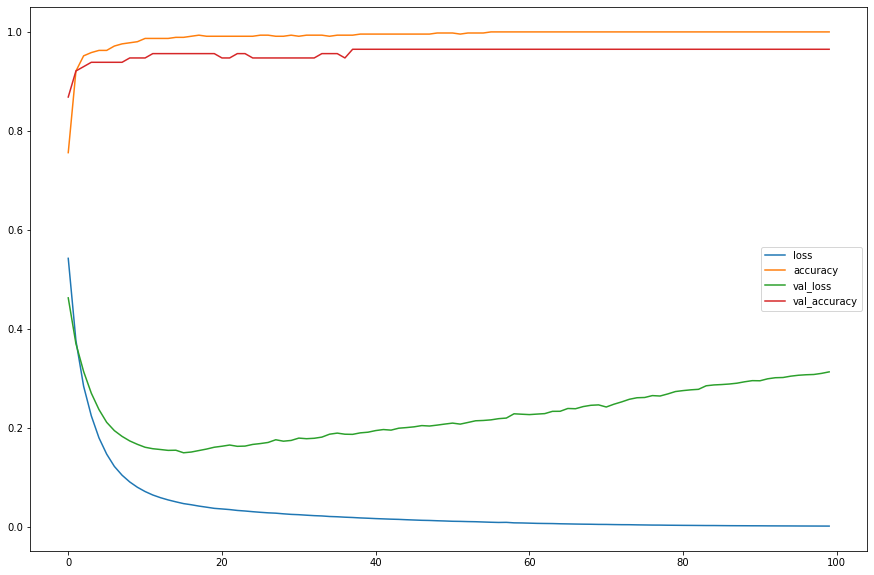

In [37]:
pd.DataFrame(ann.history.history).plot(figsize=(15,10))

In [38]:
ann.evaluate(X_train, y_train)

15/15 [==============================] - 0s 1ms/step - loss: 0.0014 - accuracy: 1.0000


[0.001419352600350976, 1.0]

In [39]:
ann.evaluate(X_test, y_test)

4/4 [==============================] - 0s 2ms/step - loss: 0.3131 - accuracy: 0.9649


[0.3130885064601898, 0.9649122953414917]

In [40]:
X_test

array([[-0.4824057 ,  0.6004669 , -0.48236813, ...,  0.09530343,
         0.14555427,  0.51944753],
       [ 0.55408218,  0.3378776 ,  0.64387538, ...,  1.39281583,
         1.32694686,  1.77939619],
       [ 0.43861139, -1.24469181,  0.40128762, ...,  0.34792969,
        -0.25521787, -0.7585921 ],
       ...,
       [ 1.48884579,  3.10209886,  1.43526825, ...,  0.72313201,
        -0.27131314, -0.46855297],
       [ 0.16368091,  0.55123141,  0.14478089, ...,  1.03555147,
         1.31407064,  1.49927792],
       [-0.33394324, -0.7781269 , -0.32488493, ..., -0.19319876,
         1.07425117, -0.14758411]])

In [41]:
X_test[[1]]

array([[ 0.55408218,  0.3378776 ,  0.64387538,  0.3928072 ,  1.49131449,
         1.79962495,  1.00554082,  1.33862681,  1.23780266,  1.49996838,
         0.51323546, -0.28472792,  0.41287654,  0.24835278, -0.03011185,
        -0.04275072, -0.00653847,  0.15751734, -0.45184208,  0.09353463,
         0.94946424,  0.99088761,  0.85579778,  0.73986449,  2.04078896,
         1.11925521,  1.02847768,  1.39281583,  1.32694686,  1.77939619]])

In [42]:
ann.predict(X_test[[1]])

array([[1.]], dtype=float32)

In [43]:
y_test[[1]]

array([1])

In [44]:
predictions=ann.predict(X_test)
predictions

array([[3.0074189e-05],
       [1.0000000e+00],
       [2.4762750e-04],
       [3.8108230e-04],
       [1.0000000e+00],
       [9.6917823e-15],
       [1.0000000e+00],
       [9.2080125e-05],
       [4.0892698e-09],
       [3.6655588e-11],
       [2.0929365e-06],
       [9.6206315e-12],
       [6.9850566e-06],
       [1.7322131e-16],
       [9.9999857e-01],
       [2.6468372e-12],
       [1.0000000e+00],
       [1.3900229e-01],
       [1.1715382e-02],
       [9.9999952e-01],
       [9.9999905e-01],
       [5.4354525e-09],
       [4.9823410e-15],
       [2.7220052e-05],
       [8.3204257e-01],
       [4.7027071e-10],
       [1.0000000e+00],
       [9.9961424e-01],
       [8.3809120e-09],
       [9.4105253e-06],
       [2.9078262e-11],
       [9.9999964e-01],
       [1.1719485e-09],
       [1.5088908e-06],
       [6.3323284e-09],
       [9.9878383e-01],
       [8.9639658e-01],
       [4.0263250e-05],
       [3.9748389e-05],
       [5.8235702e-07],
       [1.0000000e+00],
       [6.118068

In [45]:
predictions_df=pd.DataFrame(predictions, columns=["Predictions"])
predictions_df.head()

,Predictions
0,0.000030
1,1.000000
2,0.000248
3,0.000381
4,1.000000


In [46]:
y_test_df=pd.DataFrame(y_test, columns=["Diagnosis"])
y_test_df.head()

,Diagnosis
0,0
1,1
2,0
3,0
4,1


In [47]:
comparison_df=pd.concat([predictions_df, y_test_df], axis=1)
comparison_df.head()

,Predictions,Diagnosis
0,0.000030,0
1,1.000000,1
2,0.000248,0
3,0.000381,0
4,1.000000,1


In [48]:
ann2=Sequential()

In [49]:
ann2.add(Dense(units=1, activation="relu")) # here we add a dense layer with 1 neuron

In [50]:
ann2.add(Dense(1,activation="sigmoid")) 

In [51]:
ann2.compile(optimizer="adam", loss="binary_crossentropy",metrics=["accuracy"])

In [52]:
ann2.fit(x= X_train, y= y_train, batch_size=32, epochs=100, validation_data=(X_test, y_test))

Epoch 1/100
15/15 [==============================] - 1s 18ms/step - loss: 0.9234 - accuracy: 0.3645 - val_loss: 0.8466 - val_accuracy: 0.4123
Epoch 2/100
15/15 [==============================] - 0s 6ms/step - loss: 0.8211 - accuracy: 0.4285 - val_loss: 0.7763 - val_accuracy: 0.4825
Epoch 3/100
15/15 [==============================] - 0s 6ms/step - loss: 0.7467 - accuracy: 0.4797 - val_loss: 0.7199 - val_accuracy: 0.5614
Epoch 4/100
15/15 [==============================] - 0s 6ms/step - loss: 0.7174 - accuracy: 0.5748 - val_loss: 0.6747 - val_accuracy: 0.6667
Epoch 5/100
15/15 [==============================] - 0s 6ms/step - loss: 0.6486 - accuracy: 0.7184 - val_loss: 0.6382 - val_accuracy: 0.7281
Epoch 6/100
15/15 [==============================] - 0s 6ms/step - loss: 0.6084 - accuracy: 0.7635 - val_loss: 0.6061 - val_accuracy: 0.7632
Epoch 7/100
15/15 [==============================] - 0s 6ms/step - loss: 0.5965 - accuracy: 0.7702 - val_loss: 0.5811 - val_accuracy: 0.7982
Epoch 8/100


In [53]:
ann2.evaluate(X_train, y_train)

15/15 [==============================] - 0s 1ms/step - loss: 0.1905 - accuracy: 0.9758


[0.19051335752010345, 0.9758241772651672]

In [54]:
ann2.evaluate(X_test, y_test)

4/4 [==============================] - 0s 2ms/step - loss: 0.2217 - accuracy: 0.9561


[0.22168341279029846, 0.9561403393745422]

In [55]:
ann3=Sequential()

In order to see the overfitting:

In [56]:
ann3.add(Dense(units=100, activation="relu")) # here we add a dense layer with 100 neurons

In [57]:
ann3.add(Dense(units=100, activation="relu")) # here we add a dense layer with 100 neurons

In [58]:
ann3.add(Dense(units=100, activation="relu")) # here we add a dense layer with 100 neurons

In [59]:
ann3.add(Dense(1,activation="sigmoid")) 

In [60]:
ann3.compile(optimizer="adam", loss="binary_crossentropy",metrics=["accuracy"])

In [61]:
ann3.fit(x= X_train, y= y_train, batch_size=32, epochs=100, validation_data=(X_test, y_test))

Epoch 1/100
15/15 [==============================] - 1s 21ms/step - loss: 0.5450 - accuracy: 0.7261 - val_loss: 0.2490 - val_accuracy: 0.9298
Epoch 2/100
15/15 [==============================] - 0s 7ms/step - loss: 0.1678 - accuracy: 0.9481 - val_loss: 0.1627 - val_accuracy: 0.9474
Epoch 3/100
15/15 [==============================] - 0s 7ms/step - loss: 0.0733 - accuracy: 0.9641 - val_loss: 0.1603 - val_accuracy: 0.9474
Epoch 4/100
15/15 [==============================] - 0s 6ms/step - loss: 0.0397 - accuracy: 0.9855 - val_loss: 0.1609 - val_accuracy: 0.9474
Epoch 5/100
15/15 [==============================] - 0s 6ms/step - loss: 0.0318 - accuracy: 0.9944 - val_loss: 0.1687 - val_accuracy: 0.9561
Epoch 6/100
15/15 [==============================] - 0s 6ms/step - loss: 0.0299 - accuracy: 0.9896 - val_loss: 0.1713 - val_accuracy: 0.9561
Epoch 7/100
15/15 [==============================] - 0s 6ms/step - loss: 0.0267 - accuracy: 0.9932 - val_loss: 0.1824 - val_accuracy: 0.9561
Epoch 8/100


In [62]:
ann3.evaluate(X_train, y_train)

15/15 [==============================] - 0s 1ms/step - loss: 1.4900e-05 - accuracy: 1.0000


[1.4900385394867044e-05, 1.0]

In [63]:
ann3.evaluate(X_test, y_test)

4/4 [==============================] - 0s 2ms/step - loss: 0.4715 - accuracy: 0.9561


[0.47148436307907104, 0.9561403393745422]

In [64]:
history=ann3.fit(x= X_train, y= y_train, batch_size=32, epochs=100, validation_data=(X_test, y_test))

Epoch 1/100
15/15 [==============================] - 0s 11ms/step - loss: 1.4814e-05 - accuracy: 1.0000 - val_loss: 0.4731 - val_accuracy: 0.9561
Epoch 2/100
15/15 [==============================] - 0s 7ms/step - loss: 1.4438e-05 - accuracy: 1.0000 - val_loss: 0.4740 - val_accuracy: 0.9561
Epoch 3/100
15/15 [==============================] - 0s 8ms/step - loss: 1.4122e-05 - accuracy: 1.0000 - val_loss: 0.4750 - val_accuracy: 0.9561
Epoch 4/100
15/15 [==============================] - 0s 7ms/step - loss: 1.3756e-05 - accuracy: 1.0000 - val_loss: 0.4760 - val_accuracy: 0.9561
Epoch 5/100
15/15 [==============================] - 0s 7ms/step - loss: 1.3469e-05 - accuracy: 1.0000 - val_loss: 0.4771 - val_accuracy: 0.9561
Epoch 6/100
15/15 [==============================] - 0s 8ms/step - loss: 1.3153e-05 - accuracy: 1.0000 - val_loss: 0.4789 - val_accuracy: 0.9561
Epoch 7/100
15/15 [==============================] - 0s 7ms/step - loss: 1.2764e-05 - accuracy: 1.0000 - val_loss: 0.4800 - val_a

In [65]:
ann3.history.history

{'loss': [1.4813995221629739e-05,
  1.4437841855396982e-05,
  1.4121716958470643e-05,
  1.375560987071367e-05,
  1.3469006262312178e-05,
  1.3153112377040088e-05,
  1.2763621271005832e-05,
  1.263963076780783e-05,
  1.2229567801114172e-05,
  1.1913018170162104e-05,
  1.1661992175504565e-05,
  1.1371239452273585e-05,
  1.112735117203556e-05,
  1.0778328942251392e-05,
  1.0691359420889057e-05,
  1.0308240234735422e-05,
  1.0039508197223768e-05,
  9.794548532227054e-06,
  9.5708574008313e-06,
  9.368422070110682e-06,
  9.115736247622408e-06,
  8.863095899869222e-06,
  8.630019692645874e-06,
  8.401290870097e-06,
  8.277763299702201e-06,
  8.0426079875906e-06,
  7.88443230703706e-06,
  7.710234058322385e-06,
  7.5623115662892815e-06,
  7.399742571578827e-06,
  7.259003268700326e-06,
  7.0814771788718645e-06,
  6.846001724625239e-06,
  6.794843102397863e-06,
  6.63606624584645e-06,
  6.485518042609328e-06,
  6.3588536249881145e-06,
  6.2496005739376415e-06,
  6.137468062661355e-06,
  6.0707

<AxesSubplot:>

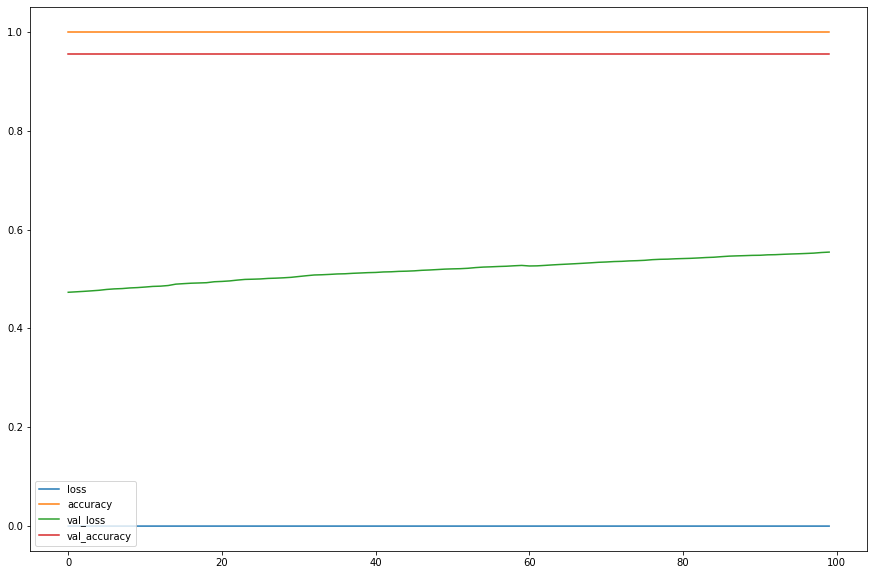

In [66]:
pd.DataFrame(ann3.history.history).plot(figsize=(15,10))

We can see an expected shape of an overfit model where test accuracy increases to a point and then begins to decrease again.

An overfit model should show accuracy increasing on both train and test and at some point accuracy drops on the test dataset but continues to rise on the training dataset.

Keras provides a weight regularization API that allows you to add a penalty for weight size to the loss function.

Three different regularizer instances are provided; they are:

L1: Sum of the absolute weights.
L2: Sum of the squared weights.
L1L2: Sum of the absolute and the squared weights.

The most common type of regularization is L2, also called simply “weight decay,” with values often on a logarithmic scale between 0 and 0.1, such as 0.1, 0.001, 0.0001, etc.

In [67]:
from keras.regularizers import l2

In [68]:
ann4=Sequential()

In [69]:
ann4.add(Dense(100,activation="relu", kernel_regularizer=l2(0.001)))

In [70]:
ann4.add(Dense(units=100, activation="relu",kernel_regularizer=l2(0.001)))

In [71]:
ann4.add(Dense(units=100, activation="relu",kernel_regularizer=l2(0.001)))

In [72]:
ann4.add(Dense(1,activation="sigmoid")) 

In [73]:
ann4.compile(optimizer="adam", loss="binary_crossentropy",metrics=["accuracy"])

In [74]:
history=ann4.fit(x= X_train, y= y_train, batch_size=32, epochs=100, validation_data=(X_test, y_test))

Epoch 1/100
15/15 [==============================] - 1s 19ms/step - loss: 0.8285 - accuracy: 0.7105 - val_loss: 0.5082 - val_accuracy: 0.9298
Epoch 2/100
15/15 [==============================] - 0s 7ms/step - loss: 0.3969 - accuracy: 0.9482 - val_loss: 0.4035 - val_accuracy: 0.9298
Epoch 3/100
15/15 [==============================] - 0s 7ms/step - loss: 0.3235 - accuracy: 0.9576 - val_loss: 0.3672 - val_accuracy: 0.9474
Epoch 4/100
15/15 [==============================] - 0s 7ms/step - loss: 0.2678 - accuracy: 0.9895 - val_loss: 0.3602 - val_accuracy: 0.9474
Epoch 5/100
15/15 [==============================] - 0s 6ms/step - loss: 0.2465 - accuracy: 0.9841 - val_loss: 0.3455 - val_accuracy: 0.9561
Epoch 6/100
15/15 [==============================] - 0s 7ms/step - loss: 0.2297 - accuracy: 0.9899 - val_loss: 0.3450 - val_accuracy: 0.9561
Epoch 7/100
15/15 [==============================] - 0s 6ms/step - loss: 0.2099 - accuracy: 0.9959 - val_loss: 0.3340 - val_accuracy: 0.9649
Epoch 8/100


<AxesSubplot:>

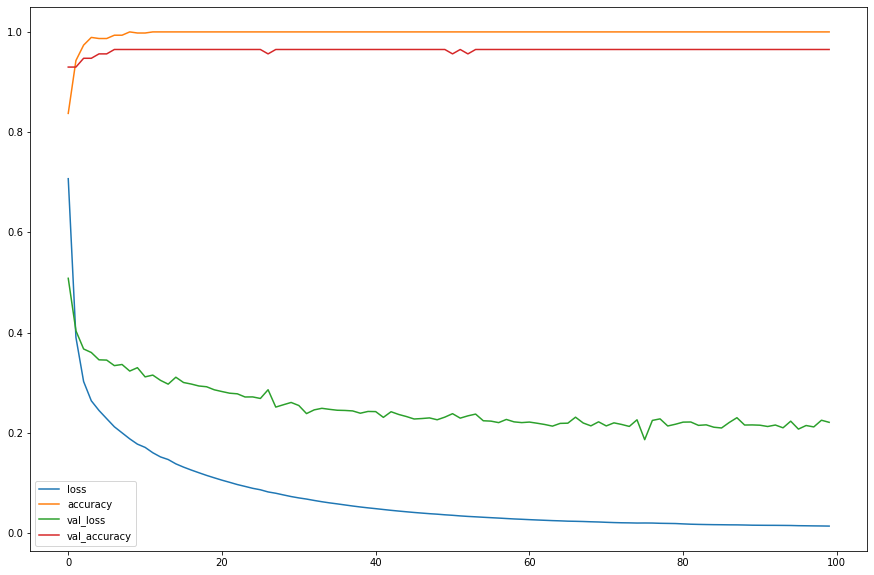

In [75]:
pd.DataFrame(ann4.history.history).plot(figsize=(15,10))

Thanks to weight decay we got %100 accuracy in the test set after 65 epoch, after that there happens a overfitting.

We will use early stopping to prevent this problem:

In [76]:
from tensorflow.keras.callbacks import EarlyStopping

In [77]:
ann5=Sequential()

In [78]:
ann5.add(Dense(100,activation="relu", kernel_regularizer=l2(0.001)))

In [79]:
ann5.add(Dense(units=100, activation="relu",kernel_regularizer=l2(0.001)))

In [80]:
ann5.add(Dense(units=100, activation="relu",kernel_regularizer=l2(0.001)))

In [81]:
ann5.add(Dense(1,activation="sigmoid")) 

In [82]:
ann5.compile(optimizer="adam", loss="binary_crossentropy",metrics=["accuracy"])

In [83]:
history=ann5.fit(x= X_train, y= y_train, batch_size=32, epochs=100, validation_data=(X_test, y_test),callbacks=[EarlyStopping(monitor="val_accuracy",patience=10)])

Epoch 1/100
15/15 [==============================] - 1s 19ms/step - loss: 0.7215 - accuracy: 0.8426 - val_loss: 0.4593 - val_accuracy: 0.9298
Epoch 2/100
15/15 [==============================] - 0s 7ms/step - loss: 0.3622 - accuracy: 0.9610 - val_loss: 0.3975 - val_accuracy: 0.9474
Epoch 3/100
15/15 [==============================] - 0s 6ms/step - loss: 0.3055 - accuracy: 0.9717 - val_loss: 0.3727 - val_accuracy: 0.9474
Epoch 4/100
15/15 [==============================] - 0s 7ms/step - loss: 0.2640 - accuracy: 0.9906 - val_loss: 0.3789 - val_accuracy: 0.9474
Epoch 5/100
15/15 [==============================] - 0s 7ms/step - loss: 0.2351 - accuracy: 0.9964 - val_loss: 0.3644 - val_accuracy: 0.9561
Epoch 6/100
15/15 [==============================] - 0s 8ms/step - loss: 0.2189 - accuracy: 0.9942 - val_loss: 0.3522 - val_accuracy: 0.9649
Epoch 7/100
15/15 [==============================] - 0s 8ms/step - loss: 0.2118 - accuracy: 0.9956 - val_loss: 0.3537 - val_accuracy: 0.9649
Epoch 8/100


<AxesSubplot:>

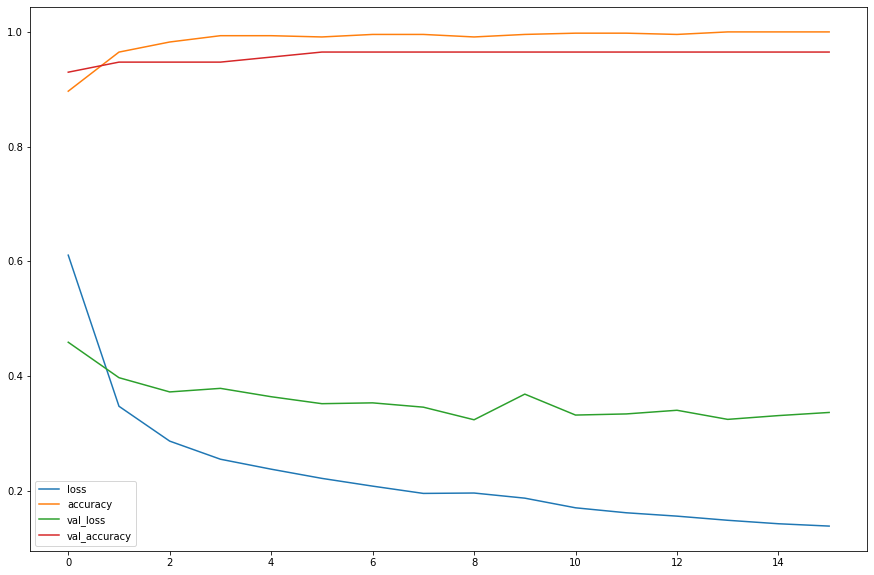

In [84]:
pd.DataFrame(ann5.history.history).plot(figsize=(15,10))
# Now we stopped the training after gettin %100 accuracy in the test set

Now we will compare the performance of the deep learning with a normal machine learning model

In [85]:
from sklearn.tree import DecisionTreeClassifier

In [86]:
dtree=DecisionTreeClassifier()

In [87]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [88]:
predictions2=dtree.predict(X_test)

In [89]:
from sklearn.metrics import classification_report, confusion_matrix

In [90]:
print(classification_report(y_test,predictions2)) 

              precision    recall  f1-score   support

           0       0.96      0.91      0.93        70
           1       0.87      0.93      0.90        44

    accuracy                           0.92       114
   macro avg       0.91      0.92      0.92       114
weighted avg       0.92      0.92      0.92       114



As we can obviously see, the deep learning model easily outperform normal machine learning algorithms.